In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

### Read in subway stations and universities locations files

In [2]:
### Original Source: http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv
df_st = pickle.load( open( "/Users/mariyapetukhova/ds/metis/metisgh/Project1/stations_loc.p", "rb" ) )

In [3]:
###Original Source: https://data.cityofnewyork.us/Education/Colleges-and-Universities/4kym-4xw5/data
df_clg = pickle.load( open( "/Users/mariyapetukhova/ds/metis/metisgh/Project1/colleges_loc.p", "rb" ) )

In [ ]:
### Set up Basemap parameters and pyplot figure
### Bounding Box and Centroid (lat_0/lon_0) coordinates are taken from 
### https://www.maptechnica.com/city-map/New+York/NY/3651000

In [ ]:
## Argument: Description (
## from http://basemaptutorial.readthedocs.io/en/latest/basic_functions.html)

### llcrnrlon: The lower left corner geographical longitude
### llcrnrlat: The lower left corner geographical latitude
### urcrnrlon: The upper right corner geographical longitude
### urcrnrlat: The upper right corner geographical latitude

### lon_0: The longitude of the center of the map
### lat_0: The latitude of the center of the map
### resolution: The resolution of the included coastlines, lakes, and so on. 
### The options are c (crude, the default), l (low), i (intermediate), h (high), f (full)

# Value: Description
# cea: Cylindrical Equal Area
# mbtfpq: McBryde-Thomas Flat-Polar Quartic
# aeqd: Azimuthal Equidistant
# sinu: Sinusoidal
# poly: Polyconic
# omerc: Oblique Mercator
# gnom: Gnomonic
# moll: Mollweide
# lcc: Lambert Conformal
# tmerc: Transverse Mercator
# nplaea: North-Polar Lambert Azimuthal
# gall: Gall Stereographic Cylindrical
# npaeqd: North-Polar Azimuthal Equidistant
# mill: Miller Cylindrical
# merc: Mercator
# stere: Stereographic
# eqdc: Equidistant Conic
# rotpole: Rotated Pole
# cyl: Cylindrical Equidistant
# npstere: North-Polar Stereographic
# spstere: South-Polar Stereographic
# hammer: Hammer
# geos: Geostationary
# nsper: Near-Sided Perspective
# eck4: Eckert IV
# aea: Albers Equal Area
# kav7: Kavrayskiy VII
# spaeqd: South-Polar Azimuthal Equidistant
# ortho: Orthographic
# cass: Cassini-Soldner
# vandg: van der Grinten
# laea: Lambert Azimuthal Equal Area
# splaea: South-Polar Lambert Azimuthal
# robin: Robinson

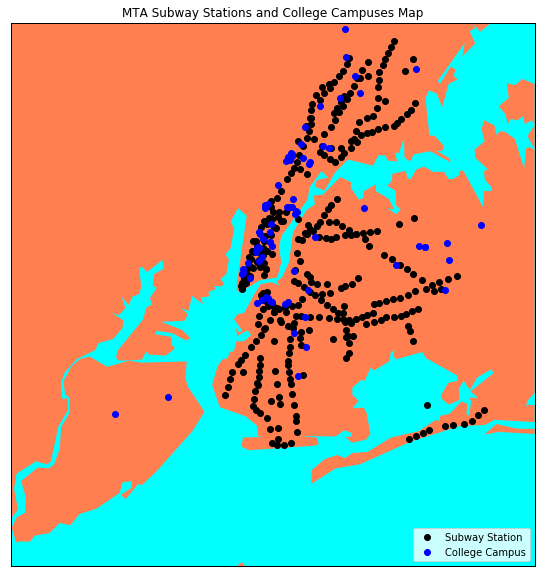

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

m = Basemap(projection='lcc',

#             A Lambert conformal conic projection (LCC) is a conic map projection used for aeronautical charts, 
#             portions of the State Plane Coordinate System, and many national and regional mapping systems.
            
            lat_0=40.6639208095151, 
            lon_0=-73.9383508826177,
            llcrnrlat=40.477399,urcrnrlat=40.917577,
            llcrnrlon= -74.25909, urcrnrlon=-73.700009,
            resolution='h')

## Populate arrays with subway stations coordinates
x_s = list(df_st['Station_Latitude'])
y_s = list(df_st['Station_Longitude'])

## Populate arrays with colleges/universities coordinates
x_c = list(map(float, df_clg['lat']))
y_c = list(map(float, df_clg['long']))

##  fill the oceans and continents with some colors
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

## Use the Basemap instance to calculate the position of the point in the map coordinates 
## when you have the longitude and latitude of the point (yes, longitude needs to be listed first:


## In mapping frameworks (geometry) spatial coordinates are often in order of latitude and longitude. 
## In spatial databases (geography) spatial coordinates are in x = longitude, and y = latitude.

# A Geometry object is just a 2D, flat polygon. 
# A Geography object on the other hand, is a 3D (or even 4D) polygon, that has the same curve 
# as the shape of the earth. (More on this at PostGIS.net)

x1, y1 = m(y_s,x_s)
x2, y2 = m(y_c,x_c)

## Plot subway stations with round black markers
m.plot(x1,y1,'ok',label = "Subway Station")

## Plot colleges with round blue markers
m.plot(x2,y2,'ob',label = "College Campus")
plt.legend()

plt.title('MTA Subway Stations and College Campuses Map')

#plt.show()
## Or save result as .png file: 
plt.savefig('map_ipynb.png')